In [5]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import string
import geopandas
import re, calendar, time, datetime

ModuleNotFoundError: No module named 'geopandas'

In [51]:
df = pd.read_csv("../../data/x_train_no_out_dist.csv")
df_original = pd.read_csv("../../data/train.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,County,passenger_count_0,...,passenger_count_6,passenger_count_7,passenger_count_8,passenger_count_9,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_date,pickup_hour,pickup_weekday,dis
0,id3265360,2,2016-04-10 05:35:23,2016-04-10 05:45:47,-74.000786,40.718666,-73.993324,40.762917,New York,0,...,0,0,0,0,1,0,2016-04-10,5,6,2.185876
1,id0149433,1,2016-02-20 01:11:50,2016-02-20 01:19:52,-74.000603,40.735878,-73.988289,40.727745,New York,0,...,0,0,0,0,1,0,2016-02-20,1,5,1.618498
2,id1957227,2,2016-04-09 12:43:52,2016-04-09 12:52:29,-73.996178,40.768246,-73.991699,40.759571,New York,0,...,0,0,0,0,1,0,2016-04-09,12,5,0.763916
3,id0550182,1,2016-04-23 10:30:39,2016-04-23 10:34:23,-73.984444,40.764641,-73.980377,40.770645,New York,0,...,0,0,0,0,1,0,2016-04-23,10,5,0.636374
4,id2058362,1,2016-05-13 12:24:28,2016-05-13 12:55:33,-74.011780,40.707314,-73.976707,40.752495,New York,0,...,0,0,0,0,1,0,2016-05-13,12,4,5.283654


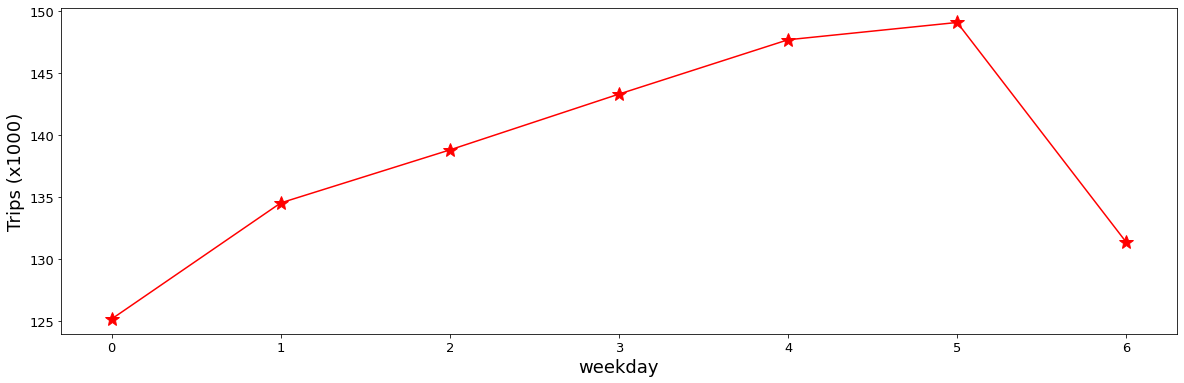

In [5]:
nomalize=1000 # tirps
fig, ax = plt.subplots(ncols=1, sharey=False)
fig.set_size_inches(20,6)
ax.plot(df.groupby('pickup_weekday').count()['vendor_id']/nomalize,  'r-*',  markersize=15,  label='Pickup')
ax.tick_params(labelsize=13)
ax.set_xlabel("weekday", fontsize=18)
ax.set_ylabel('Trips (x%d)'%nomalize, fontsize=18)
plt.show()

In [6]:
df['pickup_time'] = pd.to_datetime(df['pickup_datetime']).dt.hour + pd.to_datetime(df['pickup_datetime']).dt.minute/60 + pd.to_datetime(df['pickup_datetime']).dt.second/3600
df['dropoff_time'] = pd.to_datetime(df['dropoff_datetime']).dt.hour + pd.to_datetime(df['dropoff_datetime']).dt.minute/60 + pd.to_datetime(df['dropoff_datetime']).dt.second/3600

In [7]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,County,passenger_count_0,...,passenger_count_8,passenger_count_9,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_date,pickup_hour,pickup_weekday,dis,pickup_time,dropoff_time
0,id3265360,2,2016-04-10 05:35:23,2016-04-10 05:45:47,-74.000786,40.718666,-73.993324,40.762917,New York,0,...,0,0,1,0,2016-04-10,5,6,2.185876,5.589722,5.763056
1,id0149433,1,2016-02-20 01:11:50,2016-02-20 01:19:52,-74.000603,40.735878,-73.988289,40.727745,New York,0,...,0,0,1,0,2016-02-20,1,5,1.618498,1.197222,1.331111
2,id1957227,2,2016-04-09 12:43:52,2016-04-09 12:52:29,-73.996178,40.768246,-73.991699,40.759571,New York,0,...,0,0,1,0,2016-04-09,12,5,0.763916,12.731111,12.874722
3,id0550182,1,2016-04-23 10:30:39,2016-04-23 10:34:23,-73.984444,40.764641,-73.980377,40.770645,New York,0,...,0,0,1,0,2016-04-23,10,5,0.636374,10.510833,10.573056
4,id2058362,1,2016-05-13 12:24:28,2016-05-13 12:55:33,-74.011780,40.707314,-73.976707,40.752495,New York,0,...,0,0,1,0,2016-05-13,12,4,5.283654,12.407778,12.925833


In [8]:
def make_hist( X, xmax=None, xmin=None, binw=1, xlabel='Input', ylabel='Counts', 
              xunit='', edgecolor='black', tightLabel=False, centerLabel=False, debug=False, log=False, **hist_kwds ):    
    if not xmax:
        xmax = max(X)+binw
    if not xmin:
        xmin = min(X) if (min(X) < 0) or (min(X) >=1) else 0 
        
    if xmax <= xmin: 
        xmax = max(X)+binw
        xmin = min(X) if (min(X) < 0) or (min(X) >=1) else 0 

    hist_info_ = plt.hist( 
                           x = X[ (X <= xmax) & (X >= xmin) ],
                           bins = np.arange(xmin, xmax+binw, binw), # Due to end 2 bins are 1, hist will combined them to a bin. 
                           edgecolor = edgecolor,
                           log=log,
                           **hist_kwds
                         )
    
    if xunit == '': 
        ylabel = ylabel+' / %.2f'%(binw)
    else:
        xlabel = xlabel+' [%s]'%(xunit)
        ylabel = ylabel+' / %.2f %s'%(binw, xunit)
    plt.tick_params(labelsize=20)
    plt.xlabel(xlabel, fontsize=25)
    plt.ylabel(ylabel, fontsize=25)
    plt.ylim(ymin = 0.5 if log else 0)
    
    # Show label be bin by bin
    if tightLabel: 
        plt.xticks(hist_info_[1])
    
    # Make label be in bins' center
    if tightLabel and centerLabel:
        ax_min = min(hist_info_[1])
        ax_max = max(hist_info_[1])
        ax_wth = (hist_info_[1][1]-hist_info_[1][0])/2.
        newrange = np.arange(ax_min, ax_max+ax_wth, ax_wth)
        newnames, n = [], 0
        for i in range(len(newrange)):
            if i%2 == 0: 
                newnames.append('')
            elif n < len(hist_info_[1]): 
                v = hist_info_[1][n] if hist_info_[1][n]%1 != 0 else int(hist_info_[1][n])
                newnames.append(v)
                n+=1   
        plt.xticks(newrange, newnames)
        if debug: print(ax_min, ax_max, ax_wth, newrange)

    return hist_info_

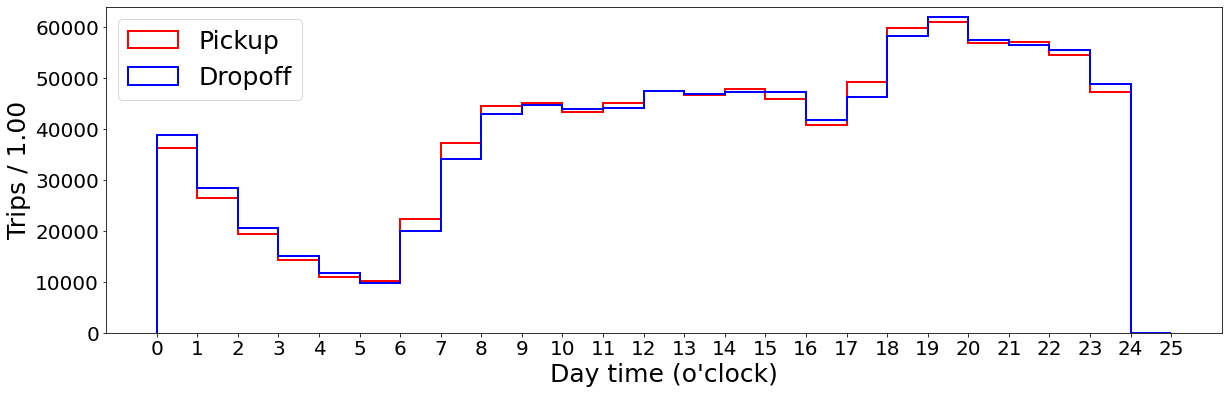

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Pickup,36228,26383,19390,14324,10900,10223,22396,37330,44580,45170,...,47954,45852,40716,49222,59906,60978,56892,57090,54565,47174
Dropoff,38884,28356,20581,15049,11750,9737,20052,34094,42999,44805,...,47366,47218,41791,46213,58210,62039,57474,56577,55464,48884


In [9]:
plt.figure(figsize=(20,6))
pick_info = make_hist(df['pickup_time'].values,  xmax=25, histtype='step', edgecolor='r', linewidth=2, xlabel="Day time (o'clock)", ylabel="Trips", label='Pickup',  tightLabel=True)
drop_info = make_hist(df['dropoff_time'].values, xmax=25, histtype='step', edgecolor='b', linewidth=2, xlabel="Day time (o'clock)", ylabel="Trips", label='Dropoff', tightLabel=True)
plt.legend(loc='upper left', fontsize=25)
plt.show()

df_trips_daytime = pd.DataFrame(data=[pick_info[0][:-1].astype(int), drop_info[0][:-1].astype(int)], columns=range(0,24,1), index=['Pickup','Dropoff'])
df_trips_daytime.head()

In [10]:
import seaborn

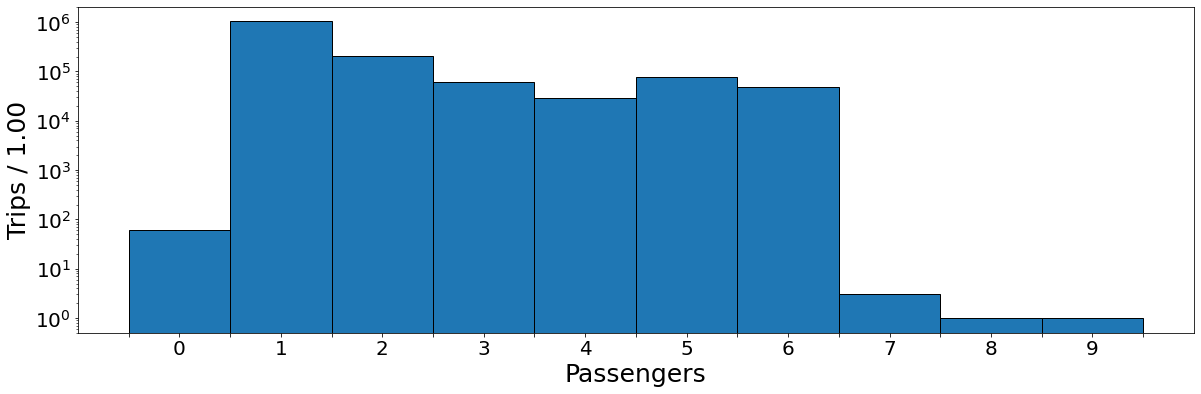

In [11]:
plt.figure(figsize=(20,6))
hist_info = make_hist(df_original['passenger_count'].values, xlabel='Passengers', ylabel='Trips', log=True, tightLabel=True, centerLabel=True)
plt.show()

In [76]:
dict_transform = {
    'New York' : 0,
    'Kings' : 1,
    'Queens' : 2,
    'External' : 3,
    'Bronx' : 4,
    'Richmond' : 5,
    'Westchester' : 6,
    'Nassau' : 7,
    'Suffolk' : 8
}
dict_transform

{'New York': 0,
 'Kings': 1,
 'Queens': 2,
 'External': 3,
 'Bronx': 4,
 'Richmond': 5,
 'Westchester': 6,
 'Nassau': 7,
 'Suffolk': 8}

In [104]:
def draw_map( x, y, county, name, zoom=.1 ):
    cutmap = zoom/100
    x_max, x_min = x.quantile(1-cutmap), x.quantile(cutmap)
    y_max, y_min = y.quantile(1-cutmap), y.quantile(cutmap)

    s = plt.scatter( x=x, 
                     y=y, 
                     s=5, alpha=0.3, c = county)
    
    plt.legend(list(dict_transform.keys()))
    plt.tick_params(labelsize=18)
    #plt.title(name, fontsize=18 )
    plt.xlabel('Longitude', fontsize=18)
    plt.ylabel('Latitude',  fontsize=18)
    return s, [x_max, x_min], [y_max, y_min] 

In [75]:
df_fix = df[(df['pickup_longitude'] < df['pickup_longitude'].quantile(0.95)) &
        (df['pickup_longitude'] > df['pickup_longitude'].quantile(0.01)) &
        (df['pickup_latitude'] < df['pickup_latitude'].quantile(0.95)) & 
        (df['pickup_latitude'] > df['pickup_latitude'].quantile(0.01)) ] 

In [85]:
x_pick, x_drop, x_county = df['pickup_longitude'], df['dropoff_longitude'], df["County"]
y_pick, y_drop = df['pickup_latitude'],  df['dropoff_latitude']
county = x_county.apply(lambda x: dict_transform[x])
#xmax = x_pick.quantile(0.95)
#xmin = x_pick.quantile(0.05)
#ymax = y_pick.quantile(0.95)
#ymin = y_pick.quantile(0.05)
#print(xmax, xmin, ymax, ymin)

In [78]:
print(f"x_pick shape: {x_pick.shape}")
print(f"y_pick shape: {y_pick.shape}")
print(f"county shape: {county.shape}")

x_pick shape: (870838,)
y_pick shape: (870838,)
county shape: (870838,)


In [103]:
list(dict_transform.keys())

['New York',
 'Kings',
 'Queens',
 'External',
 'Bronx',
 'Richmond',
 'Westchester',
 'Nassau',
 'Suffolk']

AttributeError: 'PathCollection' object has no attribute 'legend'

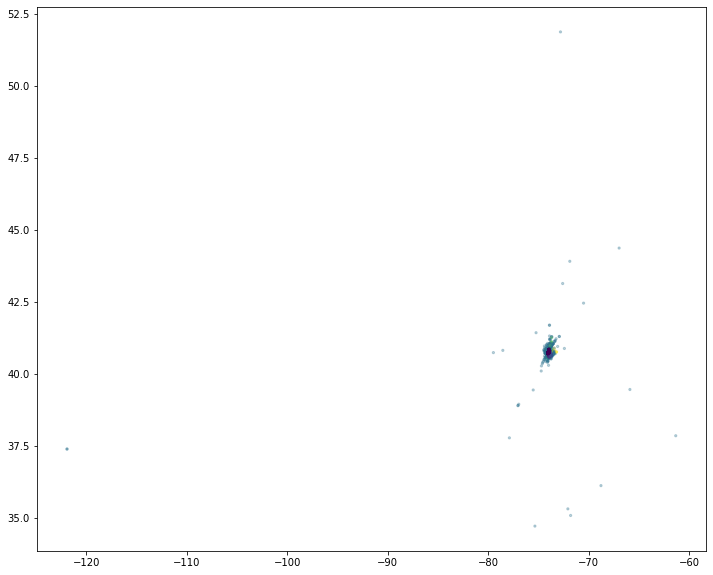

In [105]:
plt.figure(figsize=(12,10))
picks = draw_map(x_pick, y_pick, county, 'Pickup')
plt.xlim(-74.05, -73.75)
plt.ylim(40.60, 40.9)
plt.show()

In [107]:
df["county_nrm"] = df["County"].apply(lambda x: dict_transform[x])
df

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,County,passenger_count_0,...,passenger_count_7,passenger_count_8,passenger_count_9,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_date,pickup_hour,pickup_weekday,dis,county_nrm
0,id3265360,2,2016-04-10 05:35:23,2016-04-10 05:45:47,-74.000786,40.718666,-73.993324,40.762917,New York,0,...,0,0,0,1,0,2016-04-10,5,6,2.185876,0
1,id0149433,1,2016-02-20 01:11:50,2016-02-20 01:19:52,-74.000603,40.735878,-73.988289,40.727745,New York,0,...,0,0,0,1,0,2016-02-20,1,5,1.618498,0
2,id1957227,2,2016-04-09 12:43:52,2016-04-09 12:52:29,-73.996178,40.768246,-73.991699,40.759571,New York,0,...,0,0,0,1,0,2016-04-09,12,5,0.763916,0
3,id0550182,1,2016-04-23 10:30:39,2016-04-23 10:34:23,-73.984444,40.764641,-73.980377,40.770645,New York,0,...,0,0,0,1,0,2016-04-23,10,5,0.636374,0
4,id2058362,1,2016-05-13 12:24:28,2016-05-13 12:55:33,-74.011780,40.707314,-73.976707,40.752495,New York,0,...,0,0,0,1,0,2016-05-13,12,4,5.283654,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969906,id0799498,1,2016-03-01 06:30:33,2016-03-01 06:41:26,-73.950485,40.783249,-73.976074,40.755611,New York,0,...,0,0,0,1,0,2016-03-01,6,1,3.694993,0
969907,id2684379,2,2016-04-01 01:34:47,2016-04-01 02:03:58,-73.961716,40.760239,-73.905983,40.712856,New York,0,...,0,0,0,1,0,2016-04-01,1,4,7.652825,0
969908,id3271451,1,2016-03-05 01:00:23,2016-03-05 01:06:57,-73.995087,40.749977,-73.993477,40.762337,New York,0,...,0,0,0,1,0,2016-03-05,1,5,0.557931,0
969909,id2136291,2,2016-04-05 02:05:29,2016-04-05 02:10:04,-73.958015,40.773373,-73.941101,40.798481,New York,0,...,0,0,0,1,0,2016-04-05,2,1,2.652316,0


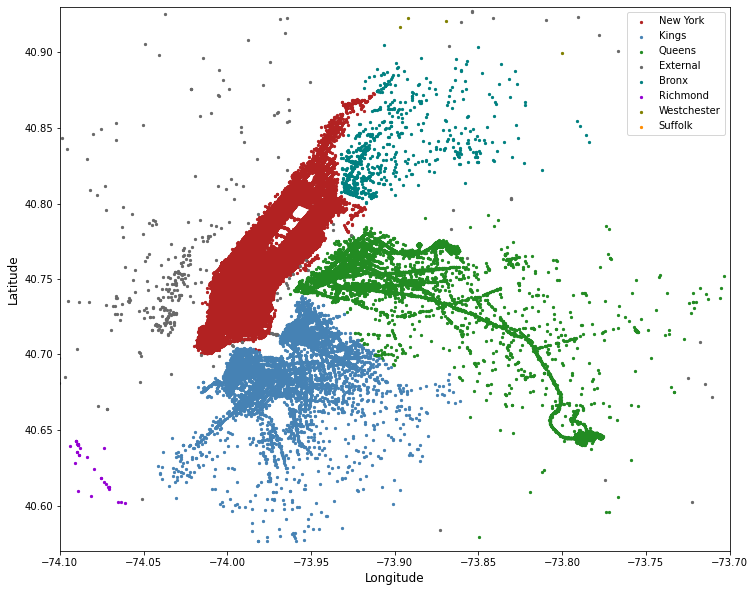

In [157]:
plt.figure(figsize=(12,10))
s_marker = 5
alpha_dot = 1
plt.scatter( x= df[df["County"] == "New York"]["pickup_longitude"], 
             y= df[df["County"] == "New York"]["pickup_latitude"], s=s_marker, alpha=alpha_dot, color = "firebrick", label = "New York")
plt.scatter( x= df[df["County"] == "Kings"]["pickup_longitude"], 
             y= df[df["County"] == "Kings"]["pickup_latitude"], s=s_marker, alpha=alpha_dot, color = "steelblue", label = "Kings")
plt.scatter( x= df[df["County"] == "Queens"]["pickup_longitude"], 
             y= df[df["County"] == "Queens"]["pickup_latitude"], s=s_marker, alpha=alpha_dot, color = "forestgreen", label = "Queens")
plt.scatter( x= df[df["County"] == "External"]["pickup_longitude"], 
             y= df[df["County"] == "External"]["pickup_latitude"], s=s_marker, alpha=alpha_dot, color = "dimgray", label = "External")
plt.scatter( x= df[df["County"] == "Bronx"]["pickup_longitude"], 
             y= df[df["County"] == "Bronx"]["pickup_latitude"], s=s_marker, alpha=alpha_dot, color = "teal", label = "Bronx")
plt.scatter( x= df[df["County"] == "Richmond"]["pickup_longitude"], 
             y= df[df["County"] == "Richmond"]["pickup_latitude"], s=s_marker, alpha=alpha_dot, color = "darkviolet", label = "Richmond")
plt.scatter( x= df[df["County"] == "Westchester"]["pickup_longitude"], 
             y= df[df["County"] == "Westchester"]["pickup_latitude"], s=s_marker, alpha=alpha_dot, color = "olive", label = "Westchester")
plt.scatter( x= df[df["County"] == "Suffolk"]["pickup_longitude"], 
             y= df[df["County"] == "Suffolk"]["pickup_latitude"], s=s_marker, alpha=alpha_dot, color = "darkorange", label = "Suffolk")
plt.legend(loc = "upper right", fontsize = 10)
plt.xlim(-74.1, -73.7)
plt.ylim(40.57, 40.93)
plt.tick_params(labelsize=10)
#plt.title(name, fontsize=18 )
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude',  fontsize=12)
plt.show()